In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install openpyxl
import math

In [91]:
df = pd.read_csv('bikes_data.csv')

In [92]:
# melihat data 5 paling atas
df.head()

,Company,Country of Origin,Model,Number of cc,Horsepower,Torque,Transmission Type,Drivetrain,Number of Seating,Price (in INR),Year,Looks,Body Type,Engine Type,Number of Cylinders
0,Aprilia,Italy,RS 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 10,99,000",2021,Sport,Naked,Parallel-twin,2
1,Aprilia,Italy,Tuono 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 11,99,000",2021,Sport,Naked,Parallel-twin,2
2,Aprilia,Italy,RS 125,124.9,15 hp,12 Nm,6-speed manual,Chain,2,"INR 4,49,000",2022,Sport,Racing,Single-cylinder,1
3,Aprilia,Italy,Shiver 900,896,95 hp,90 Nm,6-speed manual,Shaft,2,"INR 13,99,000",2022,Adventure,Naked,V-twin,2
4,Aprilia,Italy,Tuono 1100,1077,175 hp,121 Nm,6-speed manual,Shaft,2,"INR 19,99,000",2022,Adventure,Naked,V-twin,2


In [84]:
df = df.drop(['Company', 'Country of Origin', 'Model', 'Transmission Type', 'Drivetrain', 'Year', 'Looks', 'Body Type', 'Engine Type'], axis='columns')

In [94]:
df.isna().count()

Company                362
Country of Origin      362
Model                  362
Number of cc           362
Horsepower             362
Torque                 362
Transmission Type      362
Drivetrain             362
Number of Seating      362
Price (in INR)         362
Year                   362
Looks                  362
Body Type              362
Engine Type            362
Number of Cylinders    362
dtype: int64

In [85]:
df.head()


,Number of cc,Horsepower,Torque,Number of Seating,Price (in INR),Number of Cylinders
0,659,100 hp,67 Nm,2,"INR 10,99,000",2
1,659,100 hp,67 Nm,2,"INR 11,99,000",2
2,124.9,15 hp,12 Nm,2,"INR 4,49,000",1
3,896,95 hp,90 Nm,2,"INR 13,99,000",2
4,1077,175 hp,121 Nm,2,"INR 19,99,000",2


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Number of cc         362 non-null    object
 1   Horsepower           362 non-null    object
 2   Torque               362 non-null    object
 3   Number of Seating    362 non-null    int64 
 4   Price (in INR)       362 non-null    object
 5   Number of Cylinders  361 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.1+ KB


In [89]:
a = df['Price (in INR)'].replace(to_replace='INR', value='').replace(to_replace=',', value='.')

In [90]:
a.head()

0    INR 10,99,000
1    INR 11,99,000
2     INR 4,49,000
3    INR 13,99,000
4    INR 19,99,000
Name: Price (in INR), dtype: object

In [79]:
df.head()

,Number of cc,Horsepower,Torque,Number of Seating,Price (in INR),Number of Cylinders
0,659,100 hp,67 Nm,2,"INR 10,99,000",2
1,659,100 hp,67 Nm,2,"INR 11,99,000",2
2,124.9,15 hp,12 Nm,2,"INR 4,49,000",1
3,896,95 hp,90 Nm,2,"INR 13,99,000",2
4,1077,175 hp,121 Nm,2,"INR 19,99,000",2


## EDA

In [23]:
#Cek Missing Value
df.isnull().sum()

Company                0
Country of Origin      0
Model                  0
Number of cc           0
Horsepower             0
Torque                 1
Transmission Type      0
Drivetrain             0
Number of Seating      0
Price (in INR)         0
Year                   0
Looks                  0
Body Type              0
Engine Type            0
Number of Cylinders    1
dtype: int64

In [27]:
#Menghapus Missing Value
df.dropna(axis=0,inplace=True)

In [28]:
#setelah itu kita melihat kembali apakah missing value sudah terhapus
df.isnull().sum()

Company                0
Country of Origin      0
Model                  0
Number of cc           0
Horsepower             0
Torque                 0
Transmission Type      0
Drivetrain             0
Number of Seating      0
Price (in INR)         0
Year                   0
Looks                  0
Body Type              0
Engine Type            0
Number of Cylinders    0
dtype: int64

In [29]:
df.shape

(360, 15)

In [30]:
df.head()

,Company,Country of Origin,Model,Number of cc,Horsepower,Torque,Transmission Type,Drivetrain,Number of Seating,Price (in INR),Year,Looks,Body Type,Engine Type,Number of Cylinders
0,Aprilia,Italy,RS 660,659,100,67.0,6-speed quickshifter,Chain,2,1099000,2021,Sport,Naked,Parallel-twin,2
1,Aprilia,Italy,Tuono 660,659,100,67.0,6-speed quickshifter,Chain,2,1199000,2021,Sport,Naked,Parallel-twin,2
2,Aprilia,Italy,RS 125,124.9,15,12.0,6-speed manual,Chain,2,449000,2022,Sport,Racing,Single-cylinder,1
3,Aprilia,Italy,Shiver 900,896,95,90.0,6-speed manual,Shaft,2,1399000,2022,Adventure,Naked,V-twin,2
4,Aprilia,Italy,Tuono 1100,1077,175,121.0,6-speed manual,Shaft,2,1999000,2022,Adventure,Naked,V-twin,2


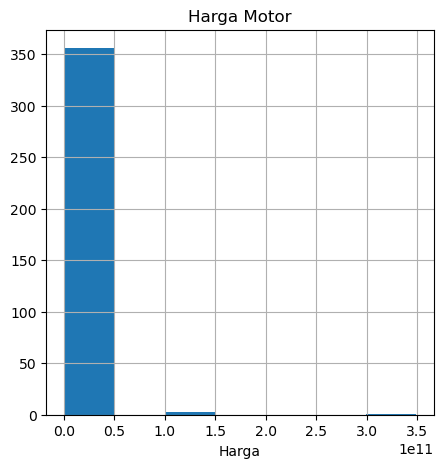

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengonversi kolom "Price" menjadi numerik
# df["Price (in INR)"] = pd.to_numeric(df["Price (in INR)"], errors="coerce")

# Membuat histogram
df[["Price (in INR)"]].hist(figsize=(5, 5), bins=7)
plt.title("Harga Motor")
plt.xlabel("Harga")
plt.show()


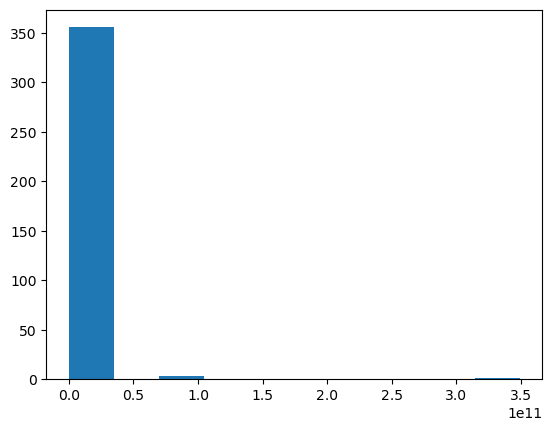

In [42]:
Price = df['Price (in INR)']
plt.hist(Price, label='Price (in INR)')
plt.show()

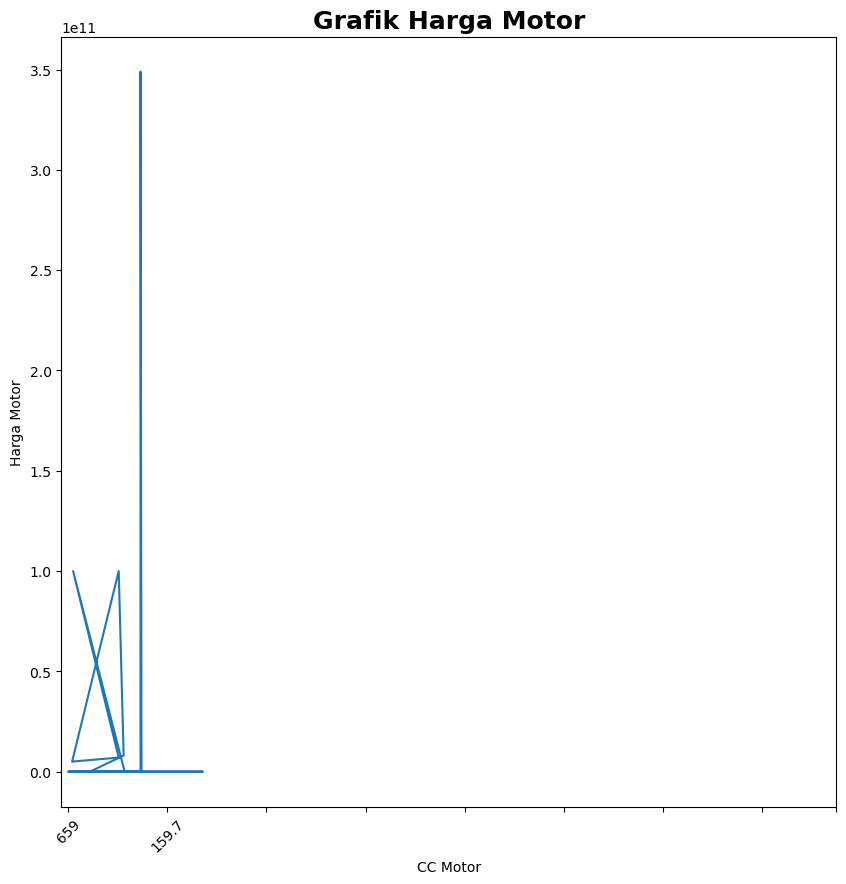

In [44]:
#Membuat Line graph
plt.figure(figsize=(10, 10))
plt.plot(df['Number of cc'],df['Price (in INR)'])
plt.title('Grafik Harga Motor', fontweight='bold',fontsize=18)
plt.xlabel('CC Motor')
plt.ylabel('Harga Motor')
plt.xticks(rotation = 45,fontsize=10)
plt.xticks([0, 100,200,300,400,500,600,700,775])
plt.show()